Arima - univariate analysis 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
from scipy import stats
from plotly import tools
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-whitegrid")

In [3]:
df = pd.read_csv('LT_Finance_Holdings_Ltd_Stock_Price_2017_to_2020.csv',parse_dates=['Date'])

In [14]:
df_sorted = df.sort_values(by='Date',ascending=True)

In [15]:
df_sorted.head(5)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
743,2017-02-01,98.00,103.65,96.90,102.85,101.313137,1130777,5497,114562565.0,311557.0,27.55,6.75,4.85
742,2017-02-02,103.00,104.30,101.00,102.45,102.609503,805406,4342,82642309.0,200456.0,24.89,3.30,-0.55
741,2017-02-03,103.00,105.25,102.60,104.75,104.228152,687532,3361,71660190.0,207484.0,30.18,2.65,1.75
740,2017-02-06,104.80,105.85,104.35,104.90,105.167420,470709,2401,49503251.0,150456.0,31.96,1.50,0.10
739,2017-02-07,104.05,105.25,102.65,103.75,104.054454,256420,1451,26681643.0,62652.0,24.43,2.60,-0.30


In [16]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 743 to 0
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       744 non-null    datetime64[ns]
 1   Open Price                 744 non-null    float64       
 2   High Price                 744 non-null    float64       
 3   Low Price                  744 non-null    float64       
 4   Close Price                744 non-null    float64       
 5   WAP                        744 non-null    float64       
 6   No.of Shares               744 non-null    int64         
 7   No. of Trades              744 non-null    int64         
 8   Total Turnover (Rs.)       744 non-null    float64       
 9   Deliverable Quantity       743 non-null    float64       
 10  % Deli. Qty to Traded Qty  743 non-null    float64       
 11  Spread High-Low            744 non-null    float64       
 12  Spread C

In [314]:
df_sorted.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         1
% Deli. Qty to Traded Qty    1
Spread High-Low              0
Spread Close-Open            0
dtype: int64

In [4]:
# reorder and select columns related
df_ts = df[['Date', 'Close Price']]

# Show top results
df_ts.head(5)

,Date,Close Price
0,2020-02-04,114.15
1,2020-02-03,111.05
2,2020-02-01,109.80
3,2020-01-31,117.15
4,2020-01-30,117.05


In [5]:
# Convert the Strings to Datetime and remove time in the DataFrame
df_ts['Date'] = pd.to_datetime(df_ts['Date'])

# Remove day from timestamp
df_ts['Date'] = df_ts['Date'].dt.strftime('%Y-%m')

# Sort a pandas dataframe based on DateTime field
df_ts = df_ts.sort_values(by='Date',ascending=True)

# Show top results
df_ts.head(30)

,Date,Close Price
743,2017-02,102.85
725,2017-02,116.45
726,2017-02,116.25
727,2017-02,116.30
728,2017-02,117.10
729,2017-02,117.50
730,2017-02,118.20
731,2017-02,117.40
732,2017-02,114.35
742,2017-02,102.45


In [6]:
import math

# Group by 'Date' and calculate the average price
average_prices = df_ts.groupby('Date')['Close Price'].mean()

# Print the resulting Series
print(average_prices)

Date
2017-02    111.010526
2017-03    120.172727
2017-04    124.961111
2017-05    130.909091
2017-06    137.876190
2017-07    153.154762
2017-08    176.647619
2017-09    201.633333
2017-10    201.130000
2017-11    185.811364
2017-12    171.815000
2018-01    176.370455
2018-02    162.465789
2018-03    158.871053
2018-04    167.921429
2018-05    173.268182
2018-06    162.285714
2018-07    158.561364
2018-08    180.316667
2018-09    151.372222
2018-10    124.966667
2018-11    135.285000
2018-12    147.327500
2019-01    140.347826
2019-02    126.265000
2019-03    144.702632
2019-04    145.531579
2019-05    124.150000
2019-06    120.171053
2019-07    113.652174
2019-08     97.647500
2019-09     93.631579
2019-10     85.762500
2019-11    100.505000
2019-12    116.390476
2020-01    120.452174
2020-02    111.666667
Name: Close Price, dtype: float64


In [7]:
df_ts_1 = pd.DataFrame(average_prices)
df_ts_1['Close Price'] = df_ts_1['Close Price'].round(1) 
df_ts_1

,Close Price
Date,
2017-02,111.0
2017-03,120.2
2017-04,125.0
2017-05,130.9
2017-06,137.9
2017-07,153.2
2017-08,176.6
2017-09,201.6
2017-10,201.1


In [315]:
df_sorted.drop(df.columns.difference(['Date', 'Close Price']), axis=1, inplace=True)
df_sorted.set_index('Date',inplace=True)
df_sorted.to_csv('StockPrice_LT selection.csv',index=True)

In [316]:
df_sorted.head(5)

,Close Price
Date,
2017-02-01,102.85
2017-02-02,102.45
2017-02-03,104.75
2017-02-06,104.90
2017-02-07,103.75


In [317]:
df_sorted.tail(5)

,Close Price
Date,
2020-01-30,117.05
2020-01-31,117.15
2020-02-01,109.80
2020-02-03,111.05
2020-02-04,114.15


In [318]:
df_sorted.to_csv('StockPrice_LT selection.csv',index=True)

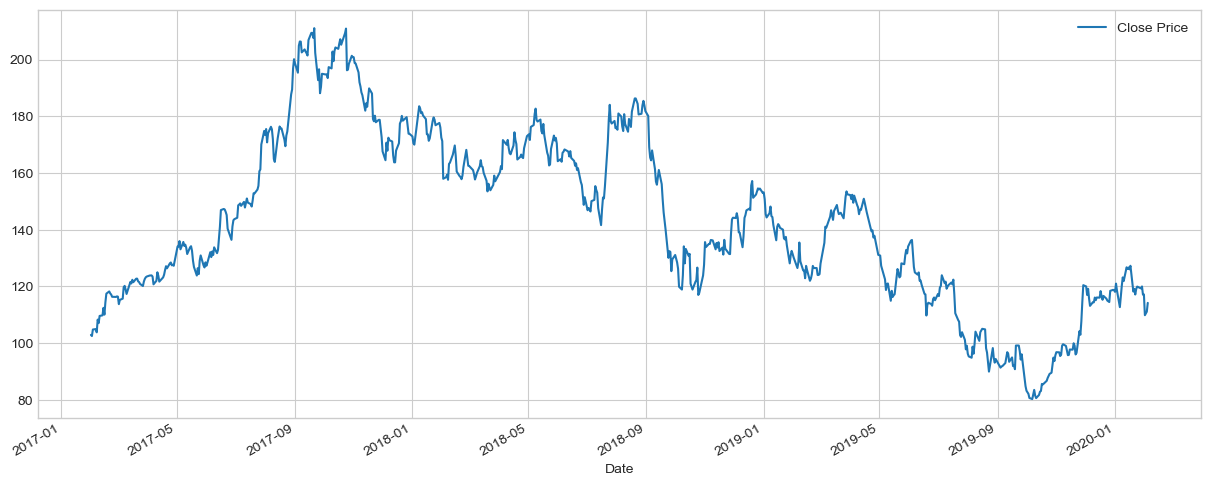

In [319]:
df_sorted.plot(figsize=(15, 6))
plt.show()

Check for stationary 
When using ARIMA, the first thing that we should be checking is the Stationarity of the data. The Augmented Dickey-Fuller test can be used to test the null hypothesis that the series is non-stationary.

Dickey-Fuller test (ADF) is used to test the null hypothesis, i.e. to check if a unit root is present in a sample of a time-series data. The alternative hypothesis is considered to be different on the version we use but is usually considered stationarity or trend-stationarity.

Basically, we are trying to decide whether to accept the Null Hypothesis or go with the Alternative Hypothesis (that the time series has no unit root and is stationary).

We end up deciding this based on the return of the p-value.

A small p-value which is considered below 0.05 indicates strong evidence against the null hypothesis, thereby we reject the null hypothesis.

A large p-value which is considered above 0.05 indicates weak or no evidence against the null hypothesis, thereby we fail to reject the null hypothesis.

The ADF test helps to understand whether a change in Y is a linear trend or not. If there is a linear trend but the lagged value cannot explain the change in Y over time, then our data will be deemed non-stationary.

In [320]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(timeseries):
    result = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('The test statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('%s: %.3f' % (key, value))

In [321]:
check_stationarity(df_sorted['Close Price'])

The test statistic: -1.774179
p-value: 0.393354
Critical Values:
1%: -3.439
5%: -2.865
10%: -2.569


Based on the information provided, you have conducted an Augmented Dickey-Fuller (ADF) test, which is commonly used to assess the stationarity of a time series. The ADF test compares the test statistic to critical values at different significance levels (1%, 5%, and 10%) to determine whether the series is stationary or not. Here's the interpretation:

The test statistic is -1.535420. This value is compared to the critical values to determine whether the series is stationary.

The p-value is 0.515923. The p-value represents the probability of obtaining a test statistic as extreme as the one observed, assuming the null hypothesis is true (the null hypothesis assumes the series is non-stationary). A higher p-value suggests weaker evidence against the null hypothesis.

Now, comparing the test statistic to the critical values:

At the 1% level of significance, the critical value is -3.439.
At the 5% level of significance, the critical value is -2.865.
At the 10% level of significance, the critical value is -2.569.
Interpretation:

Since the test statistic (-1.535420) is less extreme (more positive) than all the critical values, we fail to reject the null hypothesis. In other words, we do not have sufficient evidence to conclude that the time series is stationary. The p-value (0.515923) is greater than the conventional significance level of 0.05, further supporting this conclusion.

Therefore, based on the ADF test results, the time series appears to be non-stationary.

Differencing Data to achieve Stationarity. Also Determine value of d.


In [322]:
import numpy as np
ts_close_log = np.log(df_sorted['Close Price'])
ts_close_log

Date
2017-02-01    4.633272
2017-02-02    4.629375
2017-02-03    4.651577
2017-02-06    4.653008
2017-02-07    4.641984
                ...   
2020-01-30    4.762601
2020-01-31    4.763455
2020-02-01    4.698661
2020-02-03    4.709981
2020-02-04    4.737513
Name: Close Price, Length: 744, dtype: float64

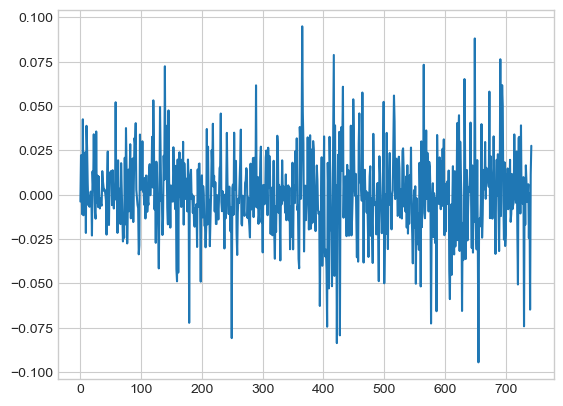

In [323]:
ts_close_log_diff = np.diff(ts_close_log)

plt.plot(ts_close_log_diff)

In [324]:
check_stationarity(ts_close_log_diff)

The test statistic: -8.171322
p-value: 0.000000
Critical Values:
1%: -3.439
5%: -2.865
10%: -2.569


Determine P and Q value from ACF and PACF plot

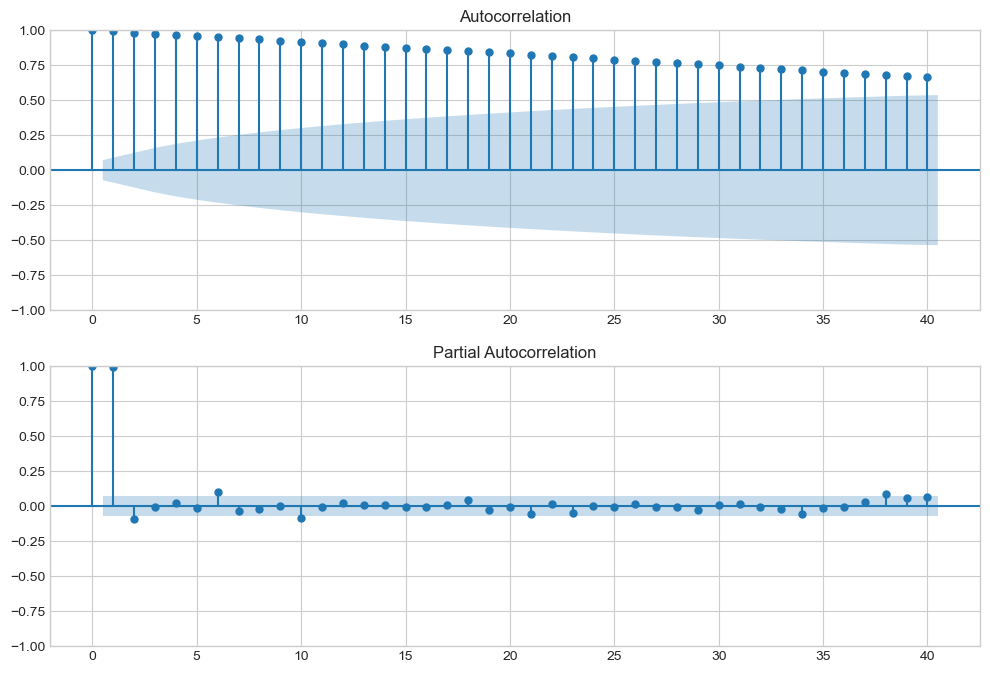

In [325]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_sorted['Close Price'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_sorted['Close Price'],lags=40,ax=ax2)

Auto ARIMA

In [ ]:
!pip install pmdarima

In [326]:
import pmdarima as pm
auto_arima_fit = pm.auto_arima(df_sorted['Close Price'], start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             seasonal=False,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3897.942, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3898.792, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3895.987, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3896.099, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3896.807, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3897.935, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3899.670, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3894.001, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3895.949, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3895.956, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3894.112, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3897.684, Time=0.15 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.035 seconds


Fit an Arima model 

In [409]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_sorted['Close Price'], order=(1, 1, 0))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:            Close Price   No. Observations:                  744
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1945.000
Date:                Tue, 13 Jun 2023   AIC                           3894.001
Time:                        21:10:03   BIC                           3903.222
Sample:                             0   HQIC                          3897.555
                                - 744                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0803      0.035      2.291      0.022       0.012       0.149
sigma2        10.9972      0.411     26.766      0.000      10.192      11.803
Ljung-Box (L1) (Q):                   0.00   Jarque-

 Residuals Diagnosis 

<Axes: xlabel='Date'>

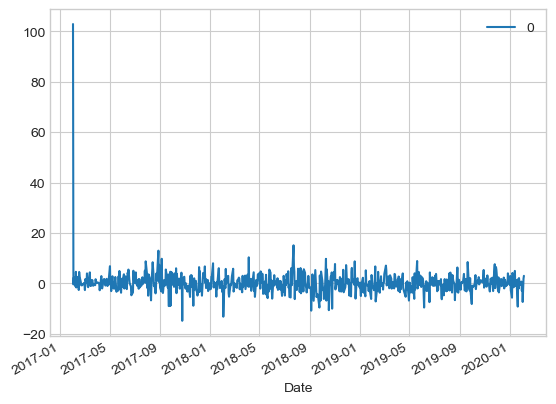

In [396]:
residuals = pd.DataFrame(results.resid)
residuals.plot()

<Axes: ylabel='Density'>

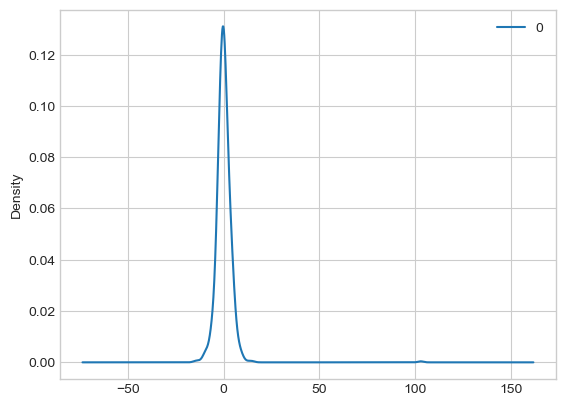

In [397]:
residuals.plot(kind='kde')

In [398]:
residuals.describe()

,0
count,744.000000
mean,0.152542
std,5.021057
min,-14.828477
25%,-1.854925
50%,-0.106581
75%,1.835203
max,102.850000


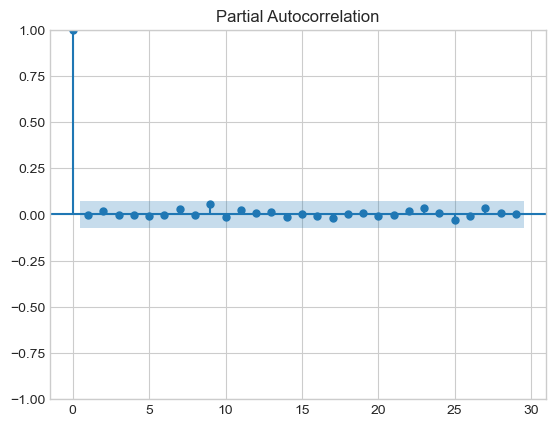

In [399]:
plot_pacf(residuals)
print()

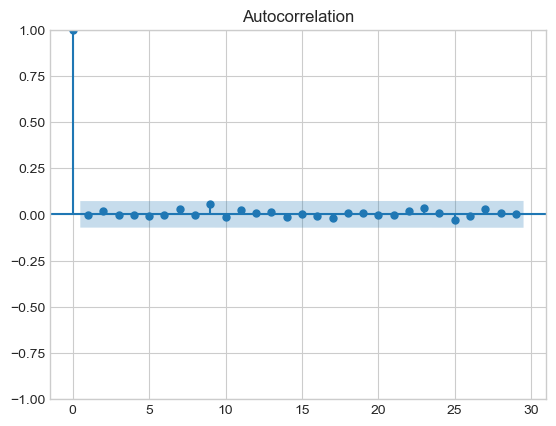

In [400]:
plot_acf(residuals)
print()

ARIMA Predict

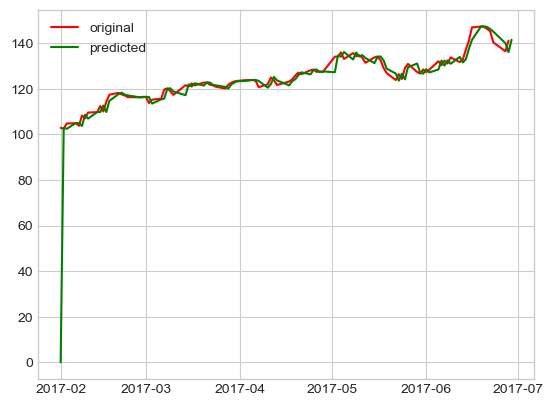

In [404]:
from math import sqrt
from sklearn.metrics import mean_squared_error

plt.plot(df_sorted['Close Price'][:100],label = 'original', color='r' )
plt.plot(results.predict(0,100),label = 'predicted', color='g' )

plt.legend()

Forecast - NaN 

In [405]:
forecast = results.predict(start = 700,
                           end= 743,
                           typ='levels').rename('Arima (1,1,0) forecast')

<Axes: xlabel='Date'>

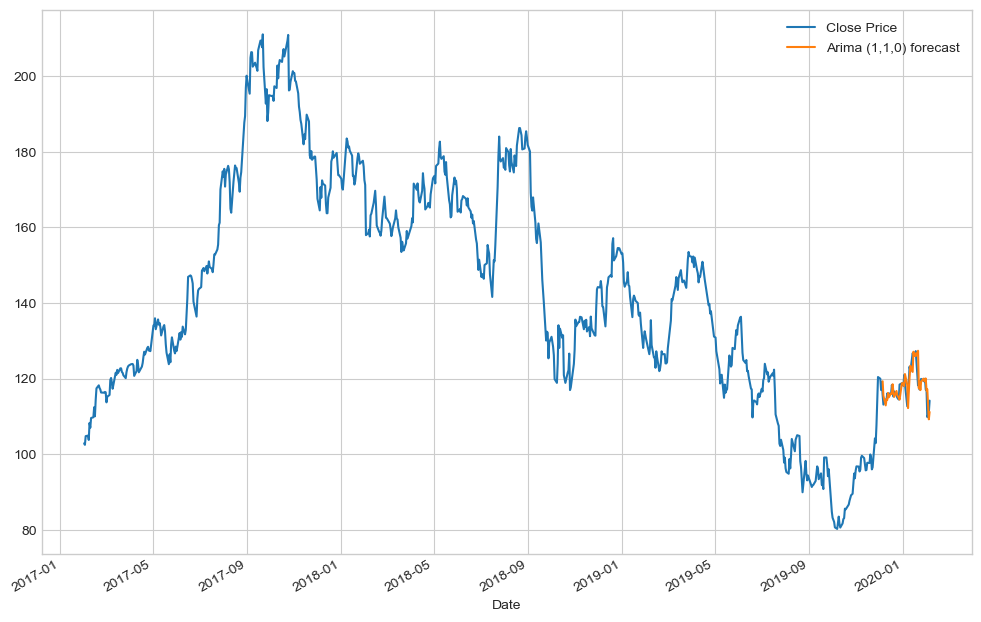

In [384]:
df_sorted['Close Price'].plot(figsize=(12,8),legend=True)
forecast.plot(legend=True)

In [338]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
rmse=rmse(df['Close Price'], results.predict())
print("The rmse value is:",rmse) 

#Calculate mean absolute_error 
mae=mean_absolute_error(df['Close Price'], results.predict())
print("The mae value is:",mae) 

# Calculate mean squared error
mse = mean_squared_error(df['Close Price'], results.predict())
print("The mse value is:",mse)

The rmse value is: 45.230533895574354
The mae value is: 38.25986867746011
The mse value is: 2045.8011964787006


Side note
1. forecast =! predict 
2. simulate the series using in-sample forecasting

In [10]:
df_ts = df.copy